### Getting to grips with linear models in Python - Exercises & Answers

## 1. Basic statistics with `pingouin`
First, lets get comfortable with some basic statistics in Python using `pingouin`, so we're on familiar ground before we dive into the GLM.



### a. Importing everything we need
You will need a few things to answer the exercises, so its good practice to import most things you will need here.
- Import `pandas`, `pingouin`, `statsmodels.formula.api` and `seaborn`.

In [1]:
# Your answer here
# Import libraries with their usual imports
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as smf
import seaborn as sns

sns.set_style('whitegrid')

### b. Loading some data
We will apply the usual statistical approaches with an interesting dataset called `affairs`. This dataset comprises a survey of married people who report the number of affairs they have had, along with several other attributes. 

The variables are summarised here, and more detail can be found [here](https://vincentarelbundock.github.io/Rdatasets/doc/AER/Affairs.html)
- `affairs` - the number of instances of extramarital sex in the last year.
- `gender`
- `age` 
- `yearsmarried`
- `children` - yes/no
- `religiousness` - degree of religiosity, higher numbers being more religious.
- `edudcation` - codes level of education (9 = grade school, 20 = PhD, and more in between).
- `occupation` - occupation coding according to a classification system called the Hollingshead.
- `rating` - self report of marital happiness (1 = very unhappy, 5 = very happy).

We'll use some basic approaches to test some hypotheses in this dataset. First, read it into a dataframe called `affairs` from the following link, and examine the top 5 rows:

https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv

In [2]:
# Your answer here
# Read in data show top 5
affairs = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv')
affairs.head()

,rownames,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


### c. Using correlation to test relationships
Conduct a correlation to test whether there is an association between self-reported marital happiness is associated with number of affairs. What is your prediction on the direction? 

Conduct a correlation with `pingouin`.

In [3]:
# Your answer here
# Correlation
cor = pg.corr(affairs['affairs'], affairs['rating'])
display(cor)

,n,r,CI95%,p-val,BF10,power
pearson,601,-0.279512,"[-0.35, -0.2]",3.002385e-12,1.796e+09,1.0


### d. Using t-tests to examine differences
Does the presence of children impact marital satisfaction? Use a t-test in `pingouin` to examine whether satisfaction differs between marriages with and without children.

If it is significant, calculate the averages between the groups to see what the differences are. Use seaborn to make a plot of the ratings between the two groups.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.16501,350.918173,two-sided,4.039127e-07,"[-0.66, -0.3]",0.44291,3.383e+04,0.998312


,rating
children,
no,4.274854
yes,3.795349


<Axes: xlabel='children', ylabel='rating'>

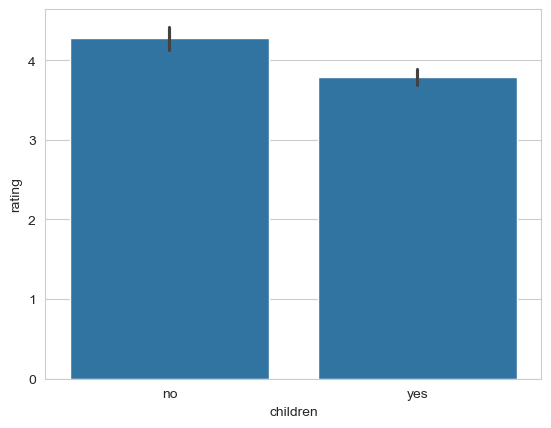

In [4]:
# Your answer here
# T-test
display(pg.ttest(affairs.query('children == "yes"')['rating'], 
         affairs.query('children == "no"')['rating']))

# Means
means = affairs.groupby(by=['children']).agg({'rating': 'mean'})
display(means)

# Plot with a barchart but other options might work
sns.barplot(data=affairs, x='children', y='rating')

### e. Using ANOVA to test slightly more complicated relationships
Does having children affect marital satisfaction differently for males and females?

To answer this, you need an 'two-way' ANOVA (eg - its a linear model with TWO predictors, each being categorical). Use ANOVA to test these differences with `pingouin`, and if you observe a difference, work out the means with `pandas` and again make a plot with `seaborn`.

,Source,SS,DF,MS,F,p-unc,np2
0,children,28.116062,1.0,28.116062,24.112908,0.000001,0.038822
1,gender,0.026971,1.0,0.026971,0.023131,0.879169,0.000039
2,children * gender,5.933417,1.0,5.933417,5.088620,0.024444,0.008452
3,Residual,696.112181,597.0,1.166017,NaN,NaN,NaN


rating
children gender          
no       female  4.404040
         male    4.097222
yes      female  3.726852
         male    3.864486

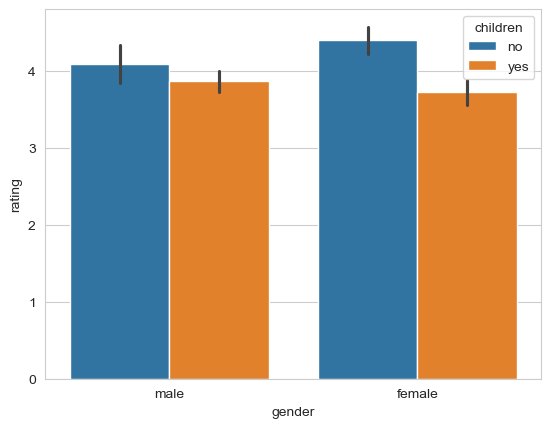

In [5]:
# Your answer here
# Carry out anova
aov = pg.anova(data=affairs, dv='rating', between=['children', 'gender'])
display(aov)

# Compute means, the interaction is significant
means = affairs.groupby(by=['children', 'gender']).agg({'rating': 'mean'})
display(means)

# Plot
sns.barplot(data=affairs, x='gender', y='rating', hue='children');

### e. Carrying out an analysis of covariance (ANCOVA).
A bit of a challenge. A popular statistical approach is the ANCOVA, which carries out an ANOVA while 'controlling' for another continuous variable, or a 'covariate'. This is simply confusing language for a general linear model with categorical predictors and a continuous predictor, which we will examine in more detail soon. 

Here, can you carry out an `ancova` with `pingouin`, assessing whether males and differ in the number of affairs they have, controlling for the years they have been married? Check the `pingouin` website [here](https://pingouin-stats.org/build/html/api.html) for help - reading documentation is a key skill in statistics and programming! Set the `effsize` (effect size) to 'n2', or standard $R^2$.


As an additional challenge, if there are any significant results, can you plot the relationship between years married and affairs, and colour the points by male vs female respondents?

,Source,SS,DF,F,p-unc,n2
0,gender,0.241436,1,0.022914,0.879732,0.000037
1,yearsmarried,227.271157,1,21.569603,0.000004,0.034813
2,Residual,6300.911061,598,NaN,NaN,NaN


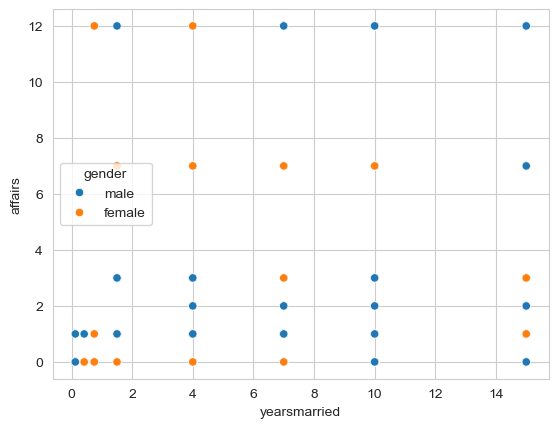

In [6]:
# Your answer here
# ANCOVA like this
aocv = pg.ancova(data=affairs, dv='affairs', between='gender', covar=['yearsmarried'], effsize='n2')
display(aocv)

# Plot like this
sns.scatterplot(data=affairs, x='yearsmarried', y='affairs', hue='gender');

## 2. The general linear model with `statsmodels`
Now we will get used to applying the general linear model to fit more complex analyses, repeat some old ones, and get to grips with the attributes of the model and how we can manipulate it.

### a. Fitting an actual linear model
We will start by using `statsmodels` to conduct a regression.

Suppose we have a theory that marital satisfaction is determined by the contribution of several predictors, that each influence how satisfied someone is in their marriage. Using the GLM, we will aim to predict marital satisfaction from the respondents gender, whether they have children (both categorical variables!), degree of religiosity, and the number of years they have been married. Notice we are already including a mix of variables - there is no restriction on variable types.

Fit this model below, and have Python show the summary.

In [7]:
# Your answer here
# Fit the model like so
model = smf.ols('rating ~ gender + children + religiousness + yearsmarried', data=affairs).fit()
display(model.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
No. Observations:                 601   F-statistic:                     11.27
Covariance Type:            nonrobust   Prob (F-statistic):           8.07e-09
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.1801      0.141     29.650      0.000       3.903       4.457
gender[T.male]      0.0093      0.087      0.106      0.916      -0.162       0.181
children[T.yes]    -0.2094      0.118     -1.775      0.076      -0.441       0.022
religiousness       0.0771      0.038      2.017      0.044       0.002       0.152
yearsmarried       -0.0420      0.010     -4.329      0.000      -0.061      -0.023
===================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b. Interpreting the coefficients
Now for the tricky part. What does each coefficient mean?

- What is the definition of the intercept?
- What is the definition of the `gender[T.male]` coefficient?
- What is the definition of the `children[T.yes]` coefficient?
- What is the definition of the `religiousness` coefficient?
- What is the definition of the `yearsmarried` coefficient?

Do any of these make sense in their current definition?

In [8]:
# Your answer here
# Intercept - average satisfaction when all other predictors at zero - which means for females with no children!
# Gender - change in for males compared to females, holding all constant
# Children - change in satisfaction for someone with children compared to without, holding all constant
# Religiousness - Increase in satisfaction for a 1 step up the scale on religiosity, holding all constant
# Years Married - Increase in satisfaction with every additional unit of years married (one year)

### c. Altering the model for interpretability
The previous model suggests some interesting relationships, but it is a little difficult to interpret it. For example, religiousness does not have a clear meaning (it ranges 1, 2, 3... etc), and years married has some slight difficulty in interpretation. It may be better to scale those two variables, so that the intercept makes sense. 

Use the formula syntax to scale the `religiousness` and `yearsmarried` predictors, and re-fit the model. Why would we not scale the `gender` and `children` predictors?

In [9]:
# Your answer here
# Scale like so
model_two = smf.ols('rating ~ gender + children + scale(religiousness) + scale(yearsmarried)', data=affairs).fit()
display(model_two.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
No. Observations:                 601   F-statistic:                     11.27
Covariance Type:            nonrobust   Prob (F-statistic):           8.07e-09
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0772      0.102     40.168      0.000       3.878       4.277
gender[T.male]           0.0093      0.087      0.106      0.916      -0.162       0.181
children[T.yes]         -0.2094      0.118     -1.775      0.076      -0.441       0.022
scale(religiousness)     0.0900      0.045      2.017      0.044       0.002       0.178
scale(yearsmarried)     -0.2336      0.054     -4.329      0.000      -0.340      -0.128
========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now what do the coefficients mean? How have they changed compared to the last one? 

In [10]:
# Your answer here
# Intercept - average satisfaction when all other predictors at zero - which means for females with no children still
# Gender - change in for males compared to females, holding all constant
# Children - change in satisfaction for someone with children compared to without, holding all constant
# Religiousness - Increase in satisfaction for a 1SD increase on religiosity, holding all constant
# Years Married - Increase in satisfaction a 1SD increase in years married (one year)

### d. Evaluating the model
The `.summary()` output suggests that while our model is statistically significant, it explains just 7% of the variance in satisfaction ratings. But we should not rely on this as a way to evaluate our model. Instead, we would like to know how *wrong our model is, on average*. And to know that, we have to compute the root-mean-squared-error, or RMSE.

Check the notes for the import and code that will do this. Take your fitted models values, and use the correct function to calculate the RMSE. 

What is it? Is it any good? 

In [11]:
# Your answer here
# Import rmse from statsmodels
from statsmodels.tools.eval_measures import rmse

# Call it
accuracy = rmse(model_two.fittedvalues, affairs['rating'])
print(accuracy)

1.0628082871251807


Note that 'any good' depends entirely on your use case, though lower is generally better. Here, we're wrong by about 1 rating scale point. That might be acceptable in some scenarios, but here it suggests that this is not particularly useful! We might consider more predictors, or more complex models, but we will get to that in time.

## 3. Comparing and contrasting analyses through the GLM
Finally, we will practice demonstrating comparisons between the analysis you performed earlier with `pingouin` and their GLM equivalents, just to drill home their similarities and to broaden your thinking about how models are used.

### a. Correlation
Earlier, you showed that the number of affairs and marital satisfaction were negatively correlated. Reproduce that analysis with a GLM in `statsmodels` below.

In [12]:
# Your answer here
# It is the scaling that makes this analysis so
smf.ols('scale(affairs) ~ scale(rating)', data=affairs).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         scale(affairs)   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
No. Observations:                 601   F-statistic:                     50.76
Covariance Type:            nonrobust   Prob (F-statistic):           3.00e-12
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.615e-16      0.039   4.12e-15      1.000      -0.077       0.077
scale(rating)    -0.2795      0.039     -7.125      0.000      -0.357      -0.202
=================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b. T-test
Can you reproduce the t-test as you did earlier, comparing satisfaction for those with and without children? Note - the t-value will not match exactly unless you turned off the 'correction' in the t-test. T-tests are for cowards. 

What do the coefficients mean here? Which category of the `children` variable became the intercept?

In [13]:
# Your answer here
# t-test is easy
smf.ols('rating ~ children', data=affairs).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
No. Observations:                 601   F-statistic:                     24.00
Covariance Type:            nonrobust   Prob (F-statistic):           1.24e-06
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2749      0.083     51.635      0.000       4.112       4.437
children[T.yes]    -0.4795      0.098     -4.899      0.000      -0.672      -0.287
===================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### c. ANCOVA
We will return to the link between ANOVA and GLM's once we expand our modelling knowledge. But for now, we can demonstrate the equivalence between *ANCOVA* and a linear model. An ANCOVA is essentially a set of categorical predictors with several continuous predictors alongside. In the above challenge, you used an ANCOVA to address whether males and females differed in the number of affairs, while controlling for the length of their marriage. Can you reproduce that in a linear model form below, and can you draw comparisons to the ANCOVA output and the linear model version?

In [14]:
# Your answer here
# Repeat ANCOVA
display(aocv)

# GLM version
aocv_model = smf.ols('affairs ~ gender + yearsmarried', data=affairs).fit()
aocv_model.summary(slim=True)

,Source,SS,DF,F,p-unc,n2
0,gender,0.241436,1,0.022914,0.879732,0.000037
1,yearsmarried,227.271157,1,21.569603,0.000004,0.034813
2,Residual,6300.911061,598,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
No. Observations:                 601   F-statistic:                     10.83
Covariance Type:            nonrobust   Prob (F-statistic):           2.40e-05
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5330      0.264      2.017      0.044       0.014       1.052
gender[T.male]     0.0402      0.265      0.151      0.880      -0.481       0.561
yearsmarried       0.1105      0.024      4.644      0.000       0.064       0.157
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the $R^2$ is the same, and that the overall pattern of results is the same too. The 'main effect' of gender is small, as is the coefficient in the linear model. Second, the years married effect is also significant, as is the coefficient of years married.

You can also access an attribute of your model called `.ssr`, which is the 'sums of squares residual'. If you do this you'll see its identical to the one reported by the ANCOVA. Its the same thing, just presented differently!

As a final challenge, can you plot the regression line over the raw data, and can you calculate the RMSE for this ANCOVA style model?

3.237907507490096


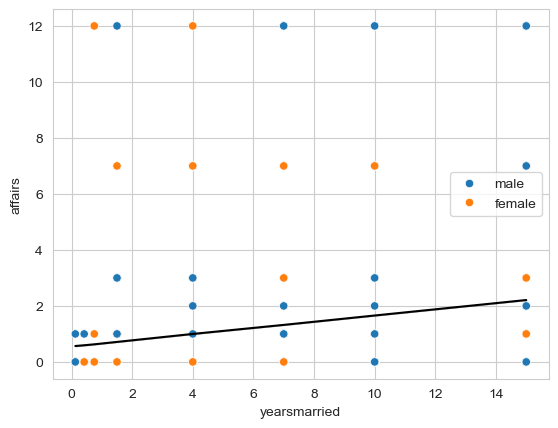

In [15]:
# Your answer here
sns.scatterplot(data=affairs, x='yearsmarried', y='affairs', hue='gender')
sns.lineplot(y=aocv_model.fittedvalues, x=affairs['yearsmarried'], color='black')

# RMSE
print(rmse(aocv_model.fittedvalues, affairs['affairs']))